In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [17]:
#フライトデータを取得
flight_dframe = sns.load_dataset('flights')

In [3]:
flight_dframe.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


 - year: 年
 - month: 月
 - passengers: 乗客数 

In [18]:
# ピボットテーブルにしてデータを扱いやすくする
flight_dframe = flight_dframe.pivot('month','year','passengers')

In [5]:
flight_dframe

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


---
# ヒートマップ

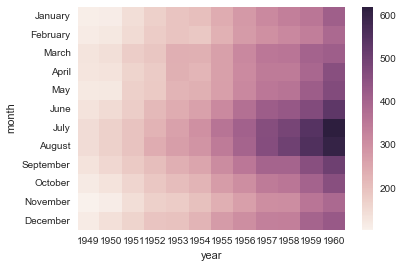

In [6]:
sns.heatmap(flight_dframe)

薄いほうは数は少なく、濃いほうは数は多い。
 - 年々、飛行機で移動する人の数が増えていっている。
 - バカンスの時期に移動する人が多い

### 数字を書き込む

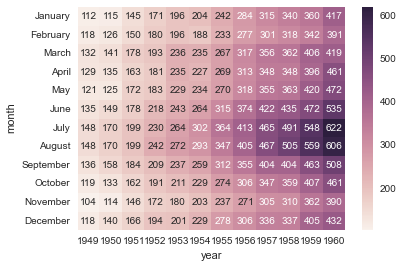

In [19]:
# annont=True：書き込む
# fmt='d': フォーマットを指定。'd'は数字
sns.heatmap(flight_dframe, annot=True, fmt='d')

### ヒートマップの色を変える
中心を指定して、色を変えられます。

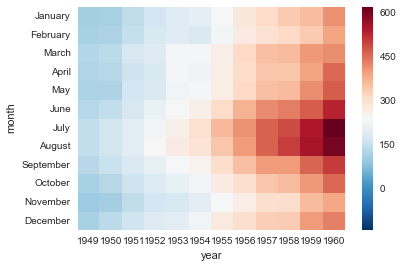

In [20]:
# 1955年の1月を中心に指定
# その指定した中心より低いと薄い色
# その指定した中心より高いと濃い色
sns.heatmap(flight_dframe, center=flight_dframe.loc['January',1955])

### ２つの描画を表示する

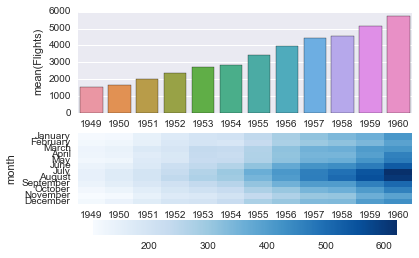

In [22]:
#2行１列に描画
f, (axis1, axis2) = plt.subplots(2,1)

#年ごとのフライトデータの合計値
yearly_flights = flight_dframe.sum()

#年代をSeriesで生成
years = pd.Series(yearly_flights.index.values)
#そのSeriesをデータフレーム化
years = pd.DataFrame(years)

#年ごとの値をSeriresで生成
flights = pd.Series(yearly_flights.values)
#データフレーム化
flights = pd.DataFrame(flights)

#yearsとフライトを列方向に
year_dframe = pd.concat((years, flights), axis=1)
year_dframe.columns = ['Year', 'Flights']

#描画
sns.barplot('Year', y='Flights', data=year_dframe, ax=axis1) #棒グラフ
sns.heatmap(flight_dframe, cmap='Blues', ax=axis2, cbar_kws={'orientation':'horizontal'}) #ヒートマップ

---
# クラスタリング

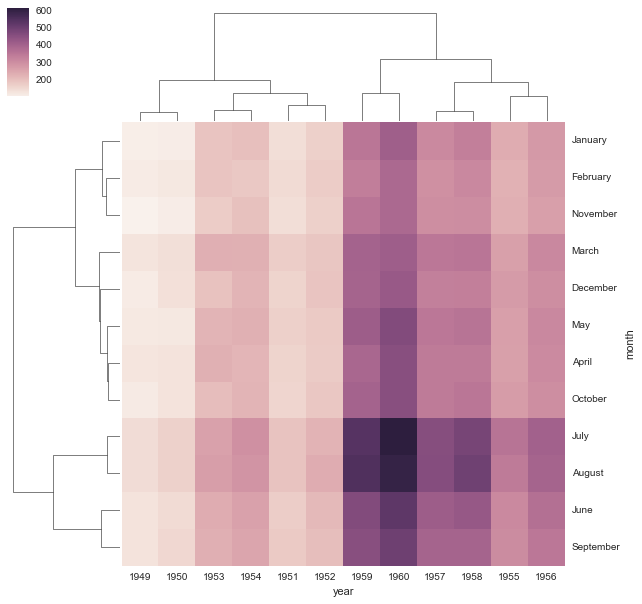

In [23]:
#行ごと、列ごとに近しいデータをまとめる
sns.clustermap(flight_dframe)

行方向(月ごと)のクラスタリングでは、バカンス時期でクラスタされている

### 軸を指定したクラスタリング

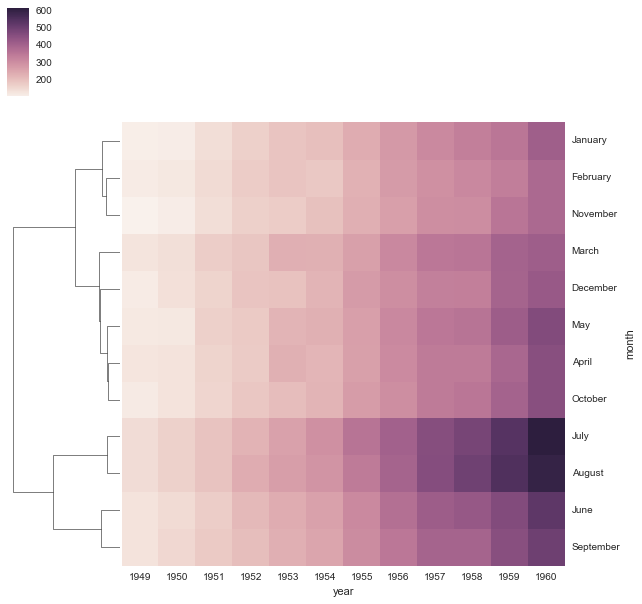

In [24]:
#列方向のクラスタリングはしない
sns.clustermap(flight_dframe, col_cluster=False)

### 軸の違いを吸収してクラスタリング
乗客者数は年々増加しているので、年代ごとの違いを吸収してクラスタリングする

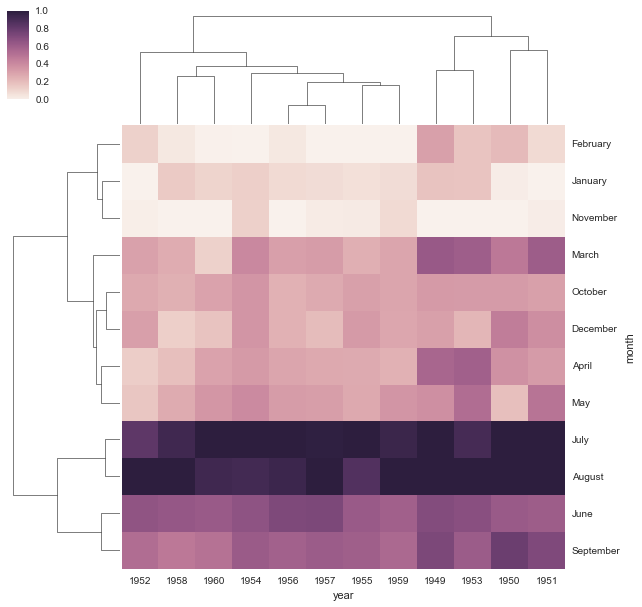

In [26]:
# standard_scale=1(列方向)
# 年代ごとの違いを吸収
sns.clustermap(flight_dframe, standard_scale=1)

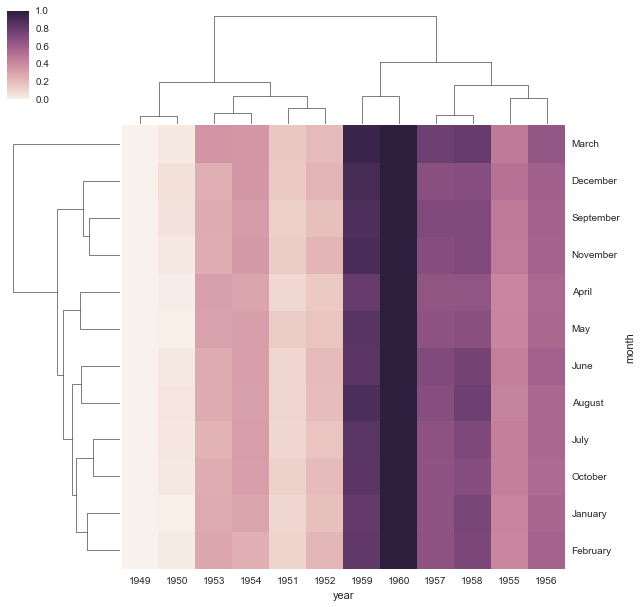

In [27]:
#行方向に標準化
sns.clustermap(flight_dframe, standard_scale=0)

### データの標準化変量してクラスタリング

標準化変量
<font size="5">
$$
z=\frac { { x }_{ i }-\overline { x }  }{ s } 
$$
</font>
平均値=0
分散=1

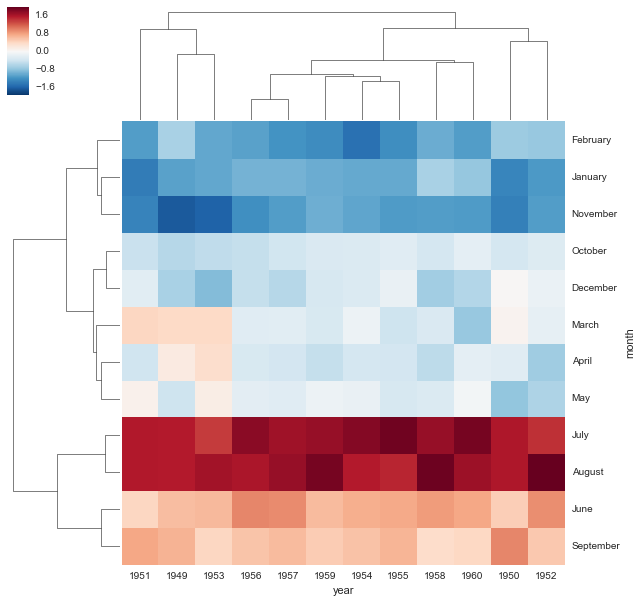

In [29]:
# z_score=1とするだけ
sns.clustermap(flight_dframe, z_score=1)

やはり夏場の乗客者が多い